<a href="https://colab.research.google.com/github/aaliyahee/MachineVision/blob/main/SobelFilter_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv_imshow
import matplotlib.pyplot as plt

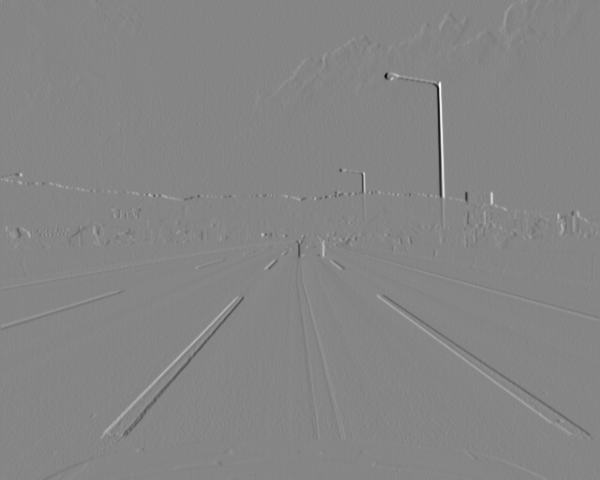

In [14]:
img=cv.imread('/content/gdrive/MyDrive/MachineVision/lanes.bmp',cv.IMREAD_GRAYSCALE)

# x방향 미분
Ix=cv.Sobel(img,ddepth=cv.CV_64F,dx=1,dy=0,ksize=3)
Ix_=(Ix-Ix.min())/(Ix.max()-Ix.min())*255

cv_imshow(Ix_)

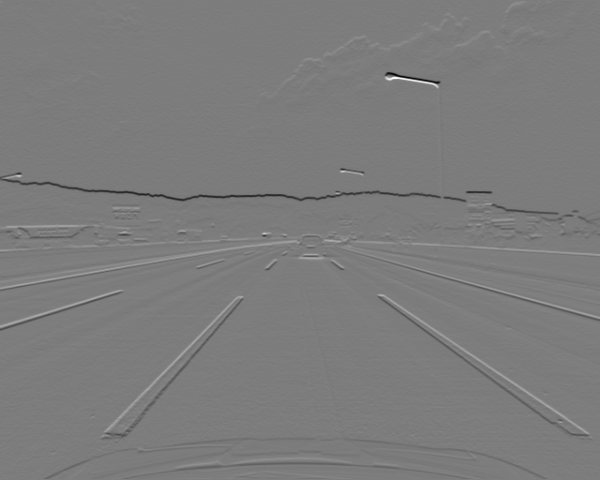

In [17]:
# y방향 미분
Iy=cv.Sobel(img,ddepth=cv.CV_64F,dx=0,dy=1,ksize=3)
Iy_=(Iy-Iy.min())/(Iy.max()-Iy.min()) * 255

cv_imshow(Iy_)

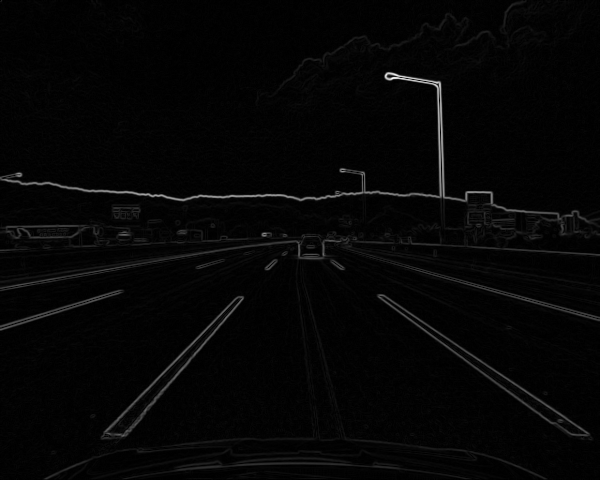

In [18]:
# Gradient magnitude
mag=np.sqrt(np.square(Ix) + np.square(Iy))
mag_=mag-mag.min())/(mag.max()-mag.min())*255

cv_imshow(mag_)

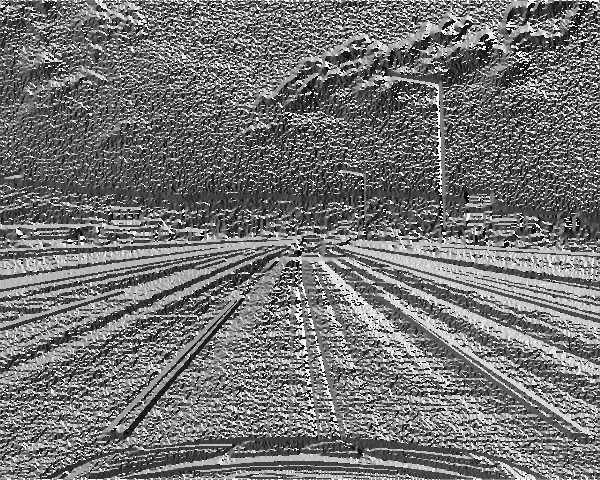

In [19]:
# Gradient orientation
ori=np.arctan2(Iy,Ix)*180/np.pi 
ori_=(ori-ori.min())/(ori.max()-ori.min())*255

cv_imshow(ori_)

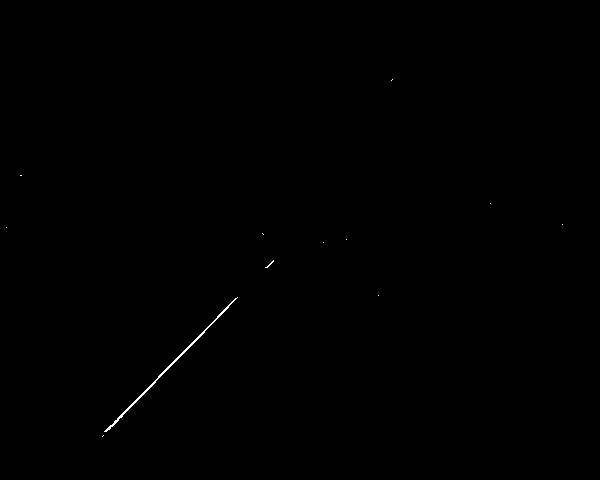

In [20]:
# Gradient mgnitude와 orientation을 기반으로 좌측 차선에 속한 픽셀 찾아 표시
result_left=np.zeros(img.shape)
id = np.where((mag>100)&(ori>30)&(ori<60))
result_left[id]=255

cv_imshow(result_left)

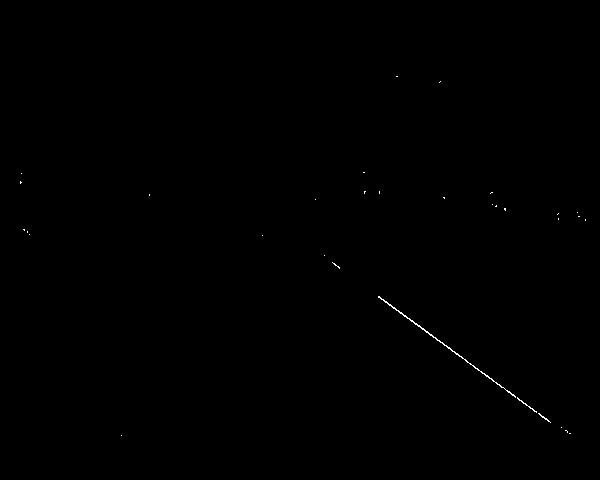

In [23]:
# Gradient mgnitude와 orientation을 기반으로 우측 차선에 속한 픽셀 찾아 표시
result_right=np.zeros(img.shape)
id=np.where((mag>100)&(ori>-60)&(ori<-30))
result_right[id]=255

cv_imshow(result_right)